In [1]:
from htm.bindings.sdr import SDR
from htm_rl.agents.cc.cortical_column import UnionTemporalPooler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def visualize(tp, h, w, step):
    sdr = tp.getUnionSDR()
    fig = plt.figure()
    fig.suptitle(f'step {step}')
    sns.heatmap(sdr.dense.reshape((h, w)), vmin=0, vmax=1, cbar=False, linewidths=.5)

In [3]:
config = dict(
    output_sparsity=0.02,
    n_cortical_columns=1,
    cells_per_cortical_column=1000,
    current_cc_id=0,
    activeOverlapWeight=0.5,
    predictedActiveOverlapWeight=0.5,
    maxUnionActivity=0.5,
    exciteFunctionType='Fixed',
    decayFunctionType='NoDecay',
    decayTimeConst=20.0,
    prune_zero_synapses_basal=True,
    activation_threshold_basal=18,
    learning_threshold_basal=15,
    connected_threshold_basal=0.5,
    initial_permanence_basal=0.4,
    permanence_increment_basal=0.1,
    permanence_decrement_basal=0.01,
    sample_size_basal=-1,
    max_synapses_per_segment_basal=-1,
    max_segments_per_cell_basal=32,
    timeseries=True,
    synPermPredActiveInc=0.1,
    synPermPreviousPredActiveInc=0.05,
    historyLength=5,
    minHistory=5,
    boostStrength=0.0,
    columnDimensions=[1000],
    inputDimensions=[100],
    potentialRadius=1000,
    dutyCyclePeriod=1000,
    globalInhibition=True,
    localAreaDensity=0.04,
    minPctOverlapDutyCycle=0.001,
    numActiveColumnsPerInhArea=0,
    potentialPct=0.5,
    seed=44,
    spVerbosity=0,
    stimulusThreshold=1,
    synPermActiveInc=0.1,
    synPermConnected=0.5,
    synPermInactiveDec=0.01,
    wrapAround=True
)

In [4]:
tp = UnionTemporalPooler(**config)

In [5]:
n = 10 

In [12]:
sequence = [(np.random.rand(config['inputDimensions'][0]) > 0.5).astype('uint32') for _ in range(n)]

In [13]:
step=0
sdr = SDR(config['inputDimensions'][0])
prev_out = SDR(config['columnDimensions'][0])

In [14]:
indeces = np.arange(0, n)

In [15]:
np.random.shuffle(indeces)

In [16]:
indeces

array([3, 5, 6, 1, 9, 8, 2, 7, 4, 0])

In [17]:
tp.reset()

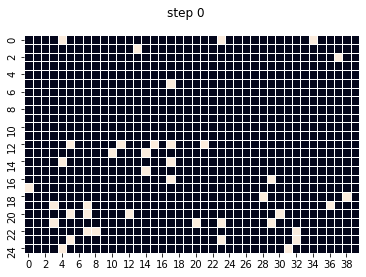

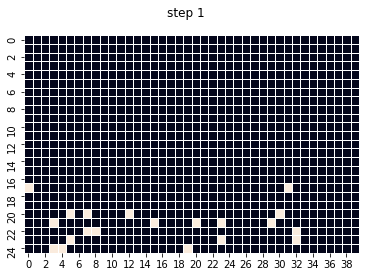

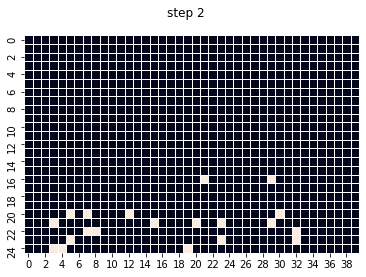

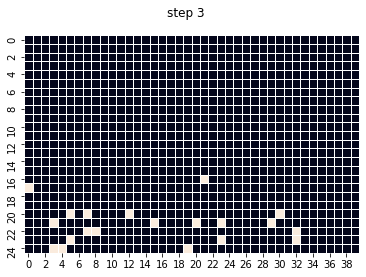

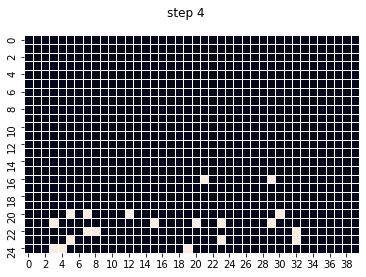

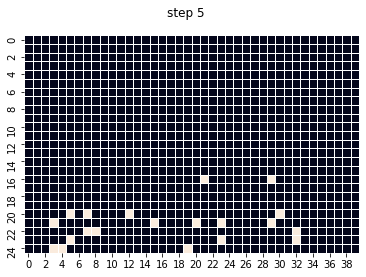

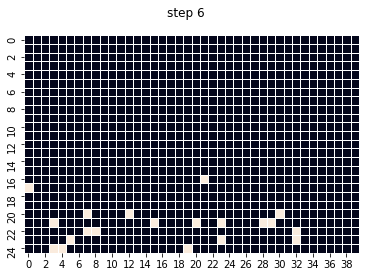

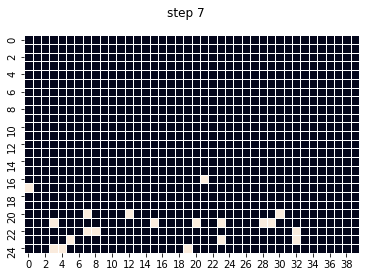

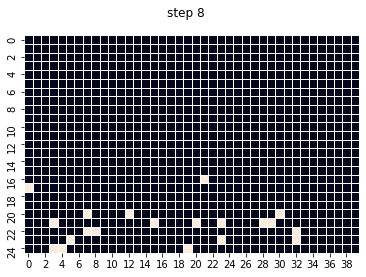

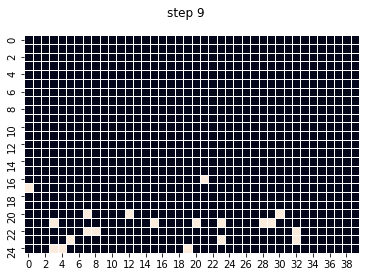

In [18]:
for i in indeces:
    sdr.dense = sequence[i]
    tp.compute(sdr, sdr, True, prev_out)
    visualize(tp, 25, -1, step)
    step += 1
    prev_out = tp.getUnionSDR()